In [78]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [79]:
input_size = 784
output_size = 10
learning_rate = 0.001
batch_size = 64
epochs = 20

In [80]:
# train_data = pd.read_csv('Data/fashion-mnist_train.csv')
# test_data = pd.read_csv('Data/fashion-mnist_train.csv')
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

In [81]:
x_train = train_data.drop('label',axis=1).values
y_train = train_data['label'].values
x_test = test_data.drop('id',axis=1).values

In [82]:
train_dataset = TensorDataset(torch.FloatTensor(x_train), torch.LongTensor(y_train))
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [83]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(input_size, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [84]:
model = Model(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [85]:
def check_accuracy(data_loader, model):

    correct = 0
    samples = 0
    model.eval()
    for batch_index, (x, y) in enumerate(data_loader):
        y_pred = model(x)
        _, y_pred = torch.max(y_pred, dim=1)
        correct += torch.sum(y_pred == y)
        samples += x.shape[0]

    print(f'Accuracy is {correct} / {samples} = {(correct/samples)*100:.2f}')
    model.train()

In [86]:
losses = []

for epoch in range(epochs):
    batch_count = 0
    total_loss = 0

    check_accuracy(train_dataloader, model)

    for batch_index, (x, y) in enumerate(train_dataloader):

        y_pred = model(x)
        loss = criterion(y_pred, y)

        total_loss += loss.item()
        batch_count += 1

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = round(total_loss / batch_count, 6)

    print(f'Epoch: {epoch} and Loss: {avg_loss}')

    losses.append(avg_loss)

Accuracy is 6213 / 60000 = 10.36
Epoch: 0 and Loss: 0.198121
Accuracy is 58555 / 60000 = 97.59
Epoch: 1 and Loss: 0.066502
Accuracy is 58851 / 60000 = 98.08
Epoch: 2 and Loss: 0.051098
Accuracy is 59388 / 60000 = 98.98
Epoch: 3 and Loss: 0.045478
Accuracy is 59356 / 60000 = 98.93
Epoch: 4 and Loss: 0.037862
Accuracy is 59429 / 60000 = 99.05
Epoch: 5 and Loss: 0.036743
Accuracy is 59602 / 60000 = 99.34
Epoch: 6 and Loss: 0.034622
Accuracy is 59712 / 60000 = 99.52
Epoch: 7 and Loss: 0.030743
Accuracy is 59580 / 60000 = 99.30
Epoch: 8 and Loss: 0.02598
Accuracy is 59701 / 60000 = 99.50
Epoch: 9 and Loss: 0.031313
Accuracy is 59700 / 60000 = 99.50
Epoch: 10 and Loss: 0.022971
Accuracy is 59731 / 60000 = 99.55
Epoch: 11 and Loss: 0.025723
Accuracy is 59621 / 60000 = 99.37
Epoch: 12 and Loss: 0.023634
Accuracy is 59605 / 60000 = 99.34
Epoch: 13 and Loss: 0.020327
Accuracy is 59715 / 60000 = 99.53
Epoch: 14 and Loss: 0.019035
Accuracy is 59764 / 60000 = 99.61
Epoch: 15 and Loss: 0.025403
Accu

Text(0.5, 0, 'Epochs')

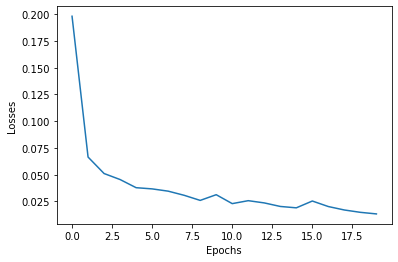

In [87]:
plt.plot(range(epochs), losses)
plt.ylabel('Losses')
plt.xlabel('Epochs')

In [88]:
print(type(x_test))
print(x_test.shape)

<class 'numpy.ndarray'>
(5000, 784)


In [89]:
x_test = torch.FloatTensor(x_test)

In [90]:
y_test = model(x_test)
y_test = torch.argmax(y_test, dim=1)

In [91]:
op = pd.DataFrame(y_test.detach().numpy())

In [92]:
op.head()

,0
0,3
1,0
2,2
3,6
4,7


In [93]:
op.rename(columns={0 :'label'}, inplace=True )
op['id'] = op.index
op = op[['id','label']]

In [94]:
op.to_csv('output.csv', index=False, header=True)